## BAM VS. AIRQO

### Stationary monitors

1.     Hourly comparison

2.     Daily  comparison

### Importing relevant packages

In [1243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import re
import os
import datetime
from sklearn.linear_model import LinearRegression  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy.stats import pearsonr
import joblib
import seaborn as sns 
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
import uncertainties as unc

### Changing default colormap - matplotlib

In [1244]:
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

### display data frame info

In [1245]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

### Reading data

In [1246]:
muk_lowcost_data = pd.read_csv('AQ_88.csv') #channel 88-thingspeak,  device colocated with MUK BAM
us_embassy_lowcost_data = pd.read_csv('AQ_51.csv') # #channel 51-thingspeak, device collocated with the US embassy BAM
muk_bam_data = pd.read_csv('MUK-BAM.csv')#MUK BAM
us_embassy_bam_data = pd.read_csv('Kampala_PM2.5_2017_2018_2019_2020.csv')#US Embassy BAM
muk_lowcost_data.head(10)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
0,2020-07-15 13:39:56 EAT,1,45.62,56.75,42.68,53.22,0.333437,32.568516,3.75,"0.333437,32.568516,1237.30,0.04,12.00,84.00,42...",NaN,NaN,NaN,NaN
1,2020-07-15 13:45:30 EAT,2,42.47,51.85,42.57,50.53,0.333481,32.568504,3.73,"0.333481,32.568504,1240.80,0.10,12.00,76.00,44...",NaN,NaN,NaN,NaN
2,2020-07-15 13:58:27 EAT,3,46.17,56.85,45.20,56.03,0.333502,32.568539,4.02,"0.333502,32.568539,1250.00,0.04,12.00,79.00,43...",NaN,NaN,NaN,NaN
3,2020-07-15 14:09:22 EAT,4,39.53,48.02,38.33,47.13,0.333471,32.568542,4.05,"0.333471,32.568542,1242.00,0.03,12.00,85.00,42...",NaN,NaN,NaN,NaN
4,2020-07-15 14:13:29 EAT,5,36.15,43.60,32.72,37.70,0.333491,32.568550,4.06,"0.333491,32.568550,1240.40,0.05,12.00,81.00,43...",NaN,NaN,NaN,NaN
5,2020-07-15 14:46:39 EAT,6,36.33,42.32,33.85,37.92,0.333486,32.568527,4.11,"0.333486,32.568527,1240.60,0.01,11.00,86.00,43...",NaN,NaN,NaN,NaN
6,2020-07-15 14:50:49 EAT,7,32.57,35.88,33.82,39.67,0.333527,32.568550,4.11,"0.333527,32.568550,1237.00,0.01,12.00,86.00,47...",NaN,NaN,NaN,NaN
7,2020-07-15 15:07:28 EAT,8,38.45,46.17,36.65,43.82,0.333511,32.568550,4.12,"0.333511,32.568550,1237.40,0.03,12.00,75.00,45...",NaN,NaN,NaN,NaN
8,2020-07-15 15:11:36 EAT,9,39.00,46.93,37.63,45.48,0.333507,32.568562,4.12,"0.333507,32.568562,1237.50,0.06,12.00,73.00,44...",NaN,NaN,NaN,NaN
9,2020-07-15 15:15:47 EAT,10,40.18,48.05,38.15,46.88,0.333521,32.568523,4.13,"0.333521,32.568523,1229.90,0.01,12.00,81.00,44...",NaN,NaN,NaN,NaN


### Renaming columns

In [1401]:
muk_lowcost_data.rename(columns={'field1':'Sensor1 PM2.5_CF_1_ug/m3','field2':'Sensor1 PM10_CF_1_ug/m3',
                                     'field3':'Sensor2PM2.5_CF_1_ug/m3', 'field4':'Sensor2 PM10_CF_1_ug/m3',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 
                                     'field8':'GpsData'},inplace=True)
muk_lowcost_data = muk_lowcost_data.drop(['entry_id','Latitude', 'Longitude', 'Battery Voltage','GpsData','latitude','longitude', 'elevation','status'], axis=1)
muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] = muk_lowcost_data[['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3']].mean(axis=1).round(2)
muk_lowcost_data['Average_PM10_CF_1_ug/m3'] = muk_lowcost_data[['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3']].mean(axis=1).round(2)

muk_lowcost_data.tail()


KeyError: "['entry_id' 'Latitude' 'Longitude' 'Battery Voltage' 'GpsData' 'latitude'\n 'longitude' 'elevation' 'status'] not found in axis"

In [1248]:
us_embassy_lowcost_data.rename(columns={'field1':'Sensor1 PM2.5_CF_1_ug/m3','field2':'Sensor1 PM10_CF_1_ug/m3',
                                     'field3':'Sensor2PM2.5_CF_1_ug/m3', 'field4':'Sensor2 PM10_CF_1_ug/m3',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 
                                     'field8':'GpsData'},inplace=True)
us_embassy_lowcost_data = us_embassy_lowcost_data.drop(['entry_id','Latitude', 'Longitude', 'Battery Voltage','GpsData','latitude','longitude', 'elevation','status'], axis=1)
us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] = us_embassy_lowcost_data[['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3']].mean(axis=1).round(2)
us_embassy_lowcost_data['Average_PM10_CF_1_ug/m3'] = us_embassy_lowcost_data[['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3']].mean(axis=1).round(2)

us_embassy_lowcost_data.tail()


,created_at,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
281103,2020-06-23 20:54:23 UTC,46.38,56.70,48.67,61.43,47.53,59.06
281104,2020-06-23 20:55:52 UTC,48.30,58.53,49.32,63.95,48.81,61.24
281105,2020-06-23 20:57:16 UTC,49.03,61.17,48.68,62.78,48.86,61.98
281106,2020-06-23 20:58:38 UTC,50.23,62.50,49.92,63.73,50.08,63.11
281107,2020-06-23 21:00:01 UTC,51.17,63.00,49.73,64.28,50.45,63.64


### Data exploration

In [1249]:
show_dataframe_info(muk_lowcost_data)

(13995, 7)
['created_at', 'Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   created_at                13995 non-null  object 
 1   Sensor1 PM2.5_CF_1_ug/m3  13995 non-null  float64
 2   Sensor1 PM10_CF_1_ug/m3   13995 non-null  float64
 3   Sensor2PM2.5_CF_1_ug/m3   13995 non-null  float64
 4   Sensor2 PM10_CF_1_ug/m3   13995 non-null  float64
 5   Average_PM2.5_CF_1_ug/m3  13995 non-null  float64
 6   Average_PM10_CF_1_ug/m3   13995 non-null  float64
dtypes: float64(6), object(1)
memory usage: 765.5+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at                   object
Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_CF_1_ug/m3  

In [1250]:
show_dataframe_info(us_embassy_lowcost_data)

(281108, 7)
['created_at', 'Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281108 entries, 0 to 281107
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   created_at                281108 non-null  object 
 1   Sensor1 PM2.5_CF_1_ug/m3  281108 non-null  float64
 2   Sensor1 PM10_CF_1_ug/m3   281108 non-null  float64
 3   Sensor2PM2.5_CF_1_ug/m3   281108 non-null  float64
 4   Sensor2 PM10_CF_1_ug/m3   281108 non-null  float64
 5   Average_PM2.5_CF_1_ug/m3  281108 non-null  float64
 6   Average_PM10_CF_1_ug/m3   281108 non-null  float64
dtypes: float64(6), object(1)
memory usage: 15.0+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at                   object
Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_C

In [1251]:
show_dataframe_info(muk_bam_data)

(1261, 13)
['Time', 'ConcRT(ug/m3)', 'ConcHR(ug/m3)', 'ConcS(ug/m3)', 'Flow(lpm)', 'WS(m/s)', 'WD(Deg)', 'AT(C)', 'RH(%)', 'BP(mmHg)', 'FT(C)', 'FRH(%)', 'Status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           1261 non-null   object 
 1   ConcRT(ug/m3)  1261 non-null   float64
 2   ConcHR(ug/m3)  1261 non-null   float64
 3   ConcS(ug/m3)   1261 non-null   float64
 4   Flow(lpm)      1261 non-null   float64
 5   WS(m/s)        1261 non-null   int64  
 6   WD(Deg)        1261 non-null   int64  
 7   AT(C)          1261 non-null   float64
 8   RH(%)          1261 non-null   int64  
 9   BP(mmHg)       1261 non-null   float64
 10  FT(C)          1261 non-null   float64
 11  FRH(%)         1261 non-null   int64  
 12  Status         1261 non-null   int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 128.2+ KB

 dat

In [1252]:
show_dataframe_info(us_embassy_bam_data)

(29969, 14)
['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit', 'Duration', 'QC Name']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29969 entries, 0 to 29968
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           29969 non-null  object 
 1   Parameter      29969 non-null  object 
 2   Date (LT)      29969 non-null  object 
 3   Year           29969 non-null  int64  
 4   Month          29969 non-null  int64  
 5   Day            29969 non-null  int64  
 6   Hour           29969 non-null  int64  
 7   NowCast Conc.  29969 non-null  float64
 8   AQI            29969 non-null  int64  
 9   AQI Category   28287 non-null  object 
 10  Raw Conc.      29969 non-null  float64
 11  Conc. Unit     29969 non-null  object 
 12  Duration       29969 non-null  object 
 13  QC Name        29969 non-null  object 
dtypes: float64(2)

# Makerere low cost device

### Setting timestamp as index 

In [1253]:
muk_lowcost_data["TimeStamp"] = pd.to_datetime(muk_lowcost_data["created_at"])
muk_lowcost_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
muk_lowcost_data = muk_lowcost_data.set_index('TimeStamp')
muk_lowcost_data = muk_lowcost_data.drop(['created_at'], axis=1)
muk_lowcost_data.head()

C:\Users\User\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning: tzname EAT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2020-07-15 13:39:56,45.62,56.75,42.68,53.22,44.15,54.98
2020-07-15 13:45:30,42.47,51.85,42.57,50.53,42.52,51.19
2020-07-15 13:58:27,46.17,56.85,45.20,56.03,45.68,56.44
2020-07-15 14:09:22,39.53,48.02,38.33,47.13,38.93,47.58
2020-07-15 14:13:29,36.15,43.60,32.72,37.70,34.44,40.65


###  Filter out outliers, get values between 0 and  500.4 

In [1254]:
muk_lowcost_data = muk_lowcost_data[muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] <= 500.4]
muk_lowcost_data = muk_lowcost_data[muk_lowcost_data['Average_PM2.5_CF_1_ug/m3'] > 0]

In [1255]:
muk_lowcost_data = muk_lowcost_data.loc['2020-07-15 13:00:00':'2020-08-26 09:00:00']

In [1256]:
muk_lowcost_data.shape

(11534, 6)

### Get hourly concetration values

In [1257]:
muk_lowcost_hourly_std  = muk_lowcost_data.resample('H').std().round(2)
muk_lowcost_hourly_mean = muk_lowcost_data.resample('H').mean().round(2)

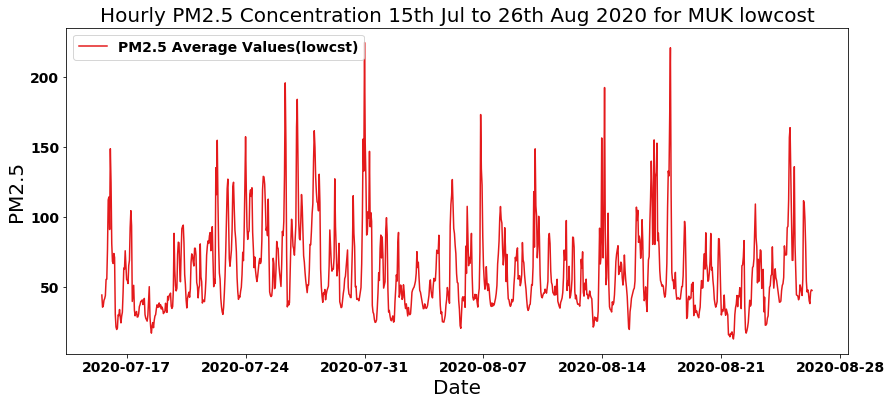

<Figure size 432x288 with 0 Axes>

In [1258]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(muk_lowcost_hourly_mean.index, 
         muk_lowcost_hourly_mean['Average_PM2.5_CF_1_ug/m3'], linestyle='solid', label='PM2.5 Average Values(lowcst)') #marker='o', 

chart_title =  'Hourly PM2.5 Concentration 15th Jul to 26th Aug 2020 for MUK lowcost'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('hourly_Muk_lowcost.png')

### Get daily concetration values

In [1259]:
muk_lowcost_daily_std    = muk_lowcost_data.resample('D').std().round(2)
muk_lowcost_daily_mean   = muk_lowcost_data.resample('D').mean().round(2)

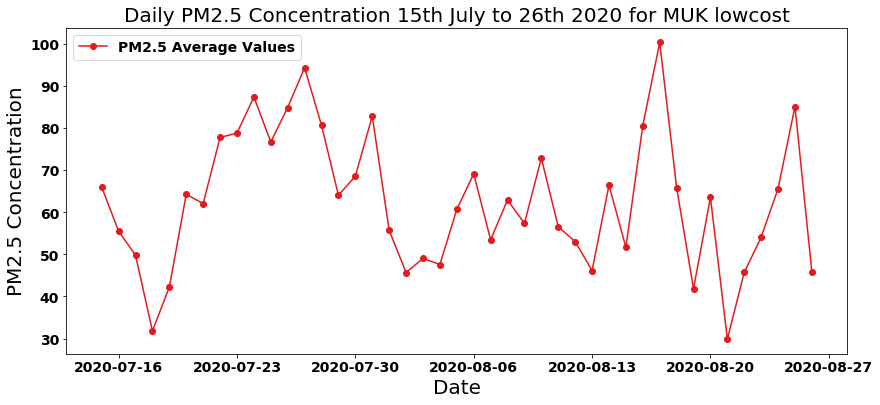

In [1402]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(muk_lowcost_daily_mean.index, 
             muk_lowcost_daily_mean['Average_PM2.5_CF_1_ug/m3'], marker='o', linestyle='solid', label='PM2.5 Average Values')
       
    chart_title =  'Daily PM2.5 Concentration 15th July to 26th 2020 for MUK lowcost'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join('daily_concentration_muk_lowcost.png'))

## MUK BAM

In [1261]:
muk_bam_data.columns

Index(['Time', 'ConcRT(ug/m3)', 'ConcHR(ug/m3)', 'ConcS(ug/m3)', 'Flow(lpm)',
       'WS(m/s)', 'WD(Deg)', 'AT(C)', 'RH(%)', 'BP(mmHg)', 'FT(C)', 'FRH(%)',
       'Status'],
      dtype='object')

### Drop extra columns

In [1262]:
#print(airquality_data_copy.columns)
muk_bam_data = muk_bam_data.drop(['Flow(lpm)', 'WS(m/s)', 'WD(Deg)', 'BP(mmHg)', 'FT(C)', 'FRH(%)', 'Status'], axis=1)

muk_bam_data.head()

,Time,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
0,2020-07-04 12:00:00,69705.9,28.4,33.1,27.7,47
1,2020-07-04 14:00:00,96000.6,18.0,21.0,27.6,47
2,2020-07-04 15:00:00,20.1,22.3,26.0,27.8,45
3,2020-07-04 16:00:00,24.6,26.8,31.2,26.8,44
4,2020-07-04 17:00:00,35.1,34.6,40.1,25.6,47


### Set timestamp as index

In [1263]:
muk_bam_data["TimeStamp"] = pd.to_datetime(muk_bam_data["Time"])
muk_bam_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
muk_bam_data = muk_bam_data.set_index('TimeStamp')
muk_bam_data = muk_bam_data.drop(['Time'], axis=1)
muk_bam_data.tail()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
TimeStamp,,,,,
2020-08-26 05:00:00,18.2,20.4,23.0,18.0,93
2020-08-26 06:00:00,11.3,17.0,19.2,17.7,94
2020-08-26 07:00:00,32.7,37.0,41.6,17.4,95
2020-08-26 08:00:00,29.3,31.6,35.7,18.1,94
2020-08-26 09:00:00,34.1,33.9,38.6,21.6,84


### Filter out outliers

In [1264]:
muk_bam_data = muk_bam_data[muk_bam_data['ConcHR(ug/m3)'] <= 500.4]
muk_bam_data = muk_bam_data[muk_bam_data['ConcHR(ug/m3)'] > 0]

### Get data from same date range for both devices - hourly

In [1265]:
## get the lower boundary date 
muk_lowcost_hourly_mean.iloc[:1,:]
t= muk_lowcost_hourly_mean.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_lowcost_hourly_mean_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(muk_lowcost_hourly_mean_lower_date)

## get the upper boundary date 
t = muk_lowcost_hourly_mean.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_lowcost_hourly_mean_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(muk_lowcost_hourly_mean_upper_date)

2020-07-15 13:00:00
2020-08-26 08:00:00


In [1266]:
## get the lower boundary date 
muk_bam_data.iloc[:1,:]
t= muk_bam_data.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_bam_data_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(muk_bam_data_lower_date)

## get the upper boundary date
t = muk_bam_data.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
muk_bam_data_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(muk_bam_data_upper_date)

2020-07-04 12:00:00
2020-08-26 09:00:00


In [1267]:
hourly_same_daterange = muk_bam_data[muk_lowcost_hourly_mean_lower_date:muk_lowcost_hourly_mean_upper_date]
hourly_same_daterange.head()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%)
TimeStamp,,,,,
2020-07-15 13:00:00,46.3,42.8,49.3,25.3,62
2020-07-15 14:00:00,99999.0,61.6,71.4,26.5,57
2020-07-15 15:00:00,5022.9,22.1,25.7,27.0,56
2020-07-15 16:00:00,21.3,20.8,24.3,27.4,54
2020-07-15 17:00:00,30.8,32.1,37.3,26.8,58


In [1268]:
hourly_same_daterange.shape

(995, 5)

### Add time column for merging  BAM and Low cost data - hourly

In [1269]:
muk_lowcost_hourly_mean  = muk_lowcost_hourly_mean.drop(
['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3', ], axis=1)
hourly_timestamp = muk_lowcost_hourly_mean.index.values
muk_lowcost_hourly_mean["Time"] = hourly_timestamp
muk_lowcost_hourly_mean["Time"] = pd.to_datetime(muk_lowcost_hourly_mean["Time"])
muk_lowcost_hourly_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-07-15 13:00:00,44.75,43.48,44.12,2020-07-15 13:00:00
2020-07-15 14:00:00,36.15,34.68,35.42,2020-07-15 14:00:00
2020-07-15 15:00:00,37.25,35.42,36.34,2020-07-15 15:00:00
2020-07-15 16:00:00,41.09,39.52,40.31,2020-07-15 16:00:00
2020-07-15 17:00:00,42.66,40.51,41.58,2020-07-15 17:00:00


In [1270]:
hourly_BAM_data =  hourly_same_daterange
hourly_timestamp = hourly_BAM_data.index.values
hourly_BAM_data["Time"] = hourly_timestamp
hourly_BAM_data["Time"] = pd.to_datetime(hourly_BAM_data["Time"])

hourly_BAM_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%),Time
TimeStamp,,,,,,
2020-07-15 13:00:00,46.3,42.8,49.3,25.3,62,2020-07-15 13:00:00
2020-07-15 14:00:00,99999.0,61.6,71.4,26.5,57,2020-07-15 14:00:00
2020-07-15 15:00:00,5022.9,22.1,25.7,27.0,56,2020-07-15 15:00:00
2020-07-15 16:00:00,21.3,20.8,24.3,27.4,54,2020-07-15 16:00:00
2020-07-15 17:00:00,30.8,32.1,37.3,26.8,58,2020-07-15 17:00:00


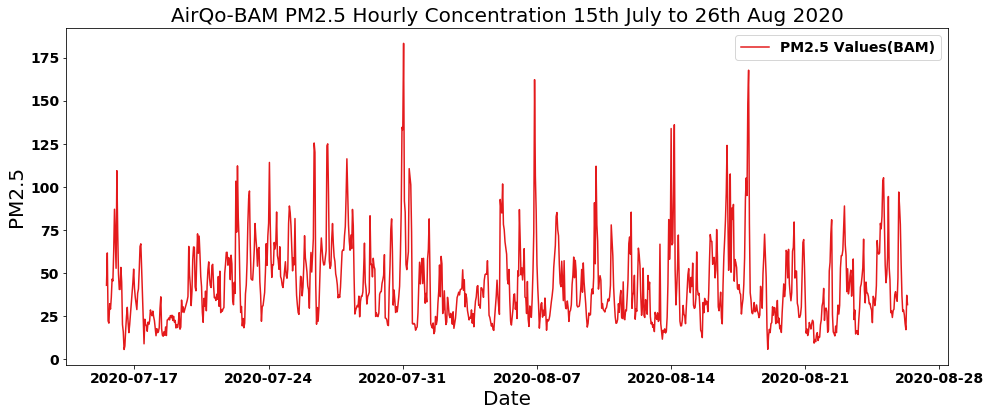

In [1271]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(hourly_BAM_data.index, 
             hourly_BAM_data['ConcHR(ug/m3)'],  linestyle='solid', label='PM2.5 Values(BAM)')
    
    chart_title =  'AirQo-BAM PM2.5 Hourly Concentration 15th July to 26th Aug 2020'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('hourly_pm25_concentration_MUK_BAM')

### Combining BAM and lowcost datasets

In [1403]:
hourly_combined_dataset= pd.merge(muk_lowcost_hourly_mean, hourly_BAM_data, on='Time')
hourly_combined_dataset.rename(columns={'Average_PM2.5_CF_1_ug/m3':'muk_lowcost_hourly_PM','ConcHR(ug/m3)':'muk_bam_hourly_PM'},inplace=True)

hourly_combined_dataset.to_csv('hourly_pm25_concentration_MUK_lowcost_vs_MUK_BAM.csv')
 
hourly_combined_dataset.head()



,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,muk_lowcost_hourly_PM,Time,ConcRT(ug/m3),muk_bam_hourly_PM,ConcS(ug/m3),AT(C),RH(%)
0,44.75,43.48,44.12,2020-07-15 13:00:00,46.3,42.8,49.3,25.3,62
1,36.15,34.68,35.42,2020-07-15 14:00:00,99999.0,61.6,71.4,26.5,57
2,37.25,35.42,36.34,2020-07-15 15:00:00,5022.9,22.1,25.7,27.0,56
3,41.09,39.52,40.31,2020-07-15 16:00:00,21.3,20.8,24.3,27.4,54
4,42.66,40.51,41.58,2020-07-15 17:00:00,30.8,32.1,37.3,26.8,58


### Accounting for time difference between the lowcost and BAM

In [1273]:
hourly_combined_dataset['muk_bam_hourly_PM'] = hourly_combined_dataset['muk_bam_hourly_PM'].shift(-1)

### check the difference in values

In [1274]:
hourly_combined_dataset['PM25_Difference'] = hourly_combined_dataset['muk_lowcost_hourly_PM'] - hourly_combined_dataset['muk_bam_hourly_PM']

### Visualise BAM vs lowcost data for MUK

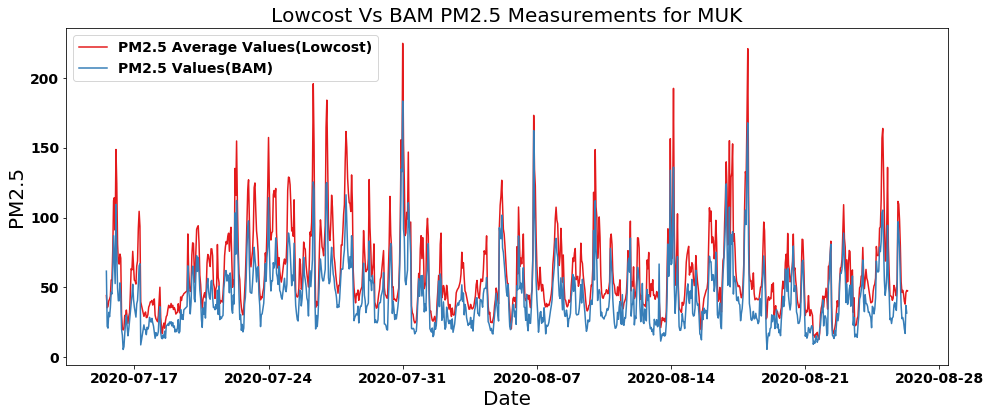

In [1275]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(hourly_combined_dataset.Time, 
             hourly_combined_dataset['muk_lowcost_hourly_PM'], linestyle='solid', label='PM2.5 Average Values(Lowcost)') #marker='o', 
    plt.plot(hourly_combined_dataset.Time, 
             hourly_combined_dataset['muk_bam_hourly_PM'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',
    
    chart_title =  'Lowcost Vs BAM PM2.5 Measurements for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('hourly_pm25_concentration_comparison_MUK.png')

### Daily Comparisons

In [1276]:
muk_bam_daily_std    = hourly_same_daterange.resample('D').std().round(2)
muk_bam_daily_mean   = hourly_same_daterange.resample('D').mean().round(2)

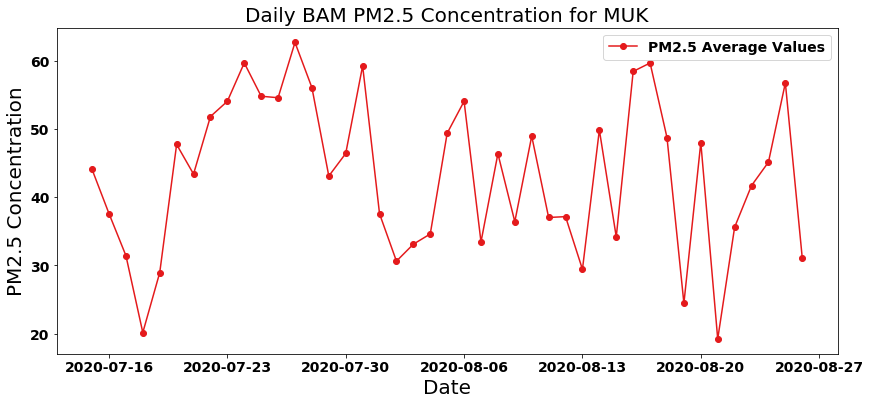

In [1277]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(muk_bam_daily_mean.index, 
             muk_bam_daily_mean['ConcHR(ug/m3)'], marker='o', linestyle='solid', label='PM2.5 Average Values')
      
    chart_title =  'Daily BAM PM2.5 Concentration for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join('daily_pm25_concentration_BAM_.png'))

### Add time column for merging  BAM and Low cost data - daily

In [1278]:
daily_lowcost_data = muk_lowcost_daily_mean
daily_lowcost_data  = daily_lowcost_data.drop(['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3'], axis=1)
daily_timestamp = daily_lowcost_data.index.values
daily_lowcost_data["Time"] = daily_timestamp
daily_lowcost_data["Time"] = pd.to_datetime(daily_lowcost_data["Time"])
daily_lowcost_data.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-07-15,68.49,63.52,66.00,2020-07-15
2020-07-16,57.56,53.56,55.56,2020-07-16
2020-07-17,51.40,48.22,49.81,2020-07-17
2020-07-18,33.12,30.51,31.81,2020-07-18
2020-07-19,43.27,41.18,42.22,2020-07-19


In [1279]:
daily_bam_data = muk_bam_daily_mean
daily_timestamp = daily_bam_data.index.values
daily_bam_data["Time"] = daily_timestamp
daily_bam_data["Time"] = pd.to_datetime(daily_bam_data["Time"])
daily_bam_data.head()

,ConcRT(ug/m3),ConcHR(ug/m3),ConcS(ug/m3),AT(C),RH(%),Time
TimeStamp,,,,,,
2020-07-15,9581.94,44.08,50.64,24.35,66.45,2020-07-15
2020-07-16,35.40,37.61,42.70,20.25,84.79,2020-07-16
2020-07-17,1458.43,31.45,35.69,20.58,79.19,2020-07-17
2020-07-18,18.42,20.15,22.93,21.09,64.62,2020-07-18
2020-07-19,5660.25,28.94,33.08,21.83,62.10,2020-07-19


In [1404]:
daily_combined_dataset= pd.merge(daily_lowcost_data, daily_bam_data, on='Time')

daily_combined_dataset.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'muk_lowcost_daily_PM','ConcHR(ug/m3)':'muk_bam_daily_PM'},inplace=True)

daily_combined_dataset.to_csv('Daily_pm25_concentration_airqo_vs_BAM_MUK.csv')
 
daily_combined_dataset.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,muk_lowcost_daily_PM,Time,ConcRT(ug/m3),muk_bam_daily_PM,ConcS(ug/m3),AT(C),RH(%)
0,68.49,63.52,66.00,2020-07-15,9581.94,44.08,50.64,24.35,66.45
1,57.56,53.56,55.56,2020-07-16,35.40,37.61,42.70,20.25,84.79
2,51.40,48.22,49.81,2020-07-17,1458.43,31.45,35.69,20.58,79.19
3,33.12,30.51,31.81,2020-07-18,18.42,20.15,22.93,21.09,64.62
4,43.27,41.18,42.22,2020-07-19,5660.25,28.94,33.08,21.83,62.10


In [1281]:
daily_combined_dataset['PM25_difference'] = daily_combined_dataset['muk_lowcost_daily_PM'] - daily_combined_dataset['muk_bam_daily_PM']
daily_combined_dataset['PM25_difference'].head(10)

0    21.92
1    17.95
2    18.36
3    11.66
4    13.28
5    16.56
6    18.71
7    25.99
8    24.81
9    27.74
Name: PM25_difference, dtype: float64

In [1282]:
daily_combined_dataset['muk_lowcost_daily_PM'].head(10)

0    66.00
1    55.56
2    49.81
3    31.81
4    42.22
5    64.31
6    62.12
7    77.84
8    78.90
9    87.46
Name: muk_lowcost_daily_PM, dtype: float64

In [1283]:
daily_combined_dataset['muk_bam_daily_PM'].head(10)

0    44.08
1    37.61
2    31.45
3    20.15
4    28.94
5    47.75
6    43.41
7    51.85
8    54.09
9    59.72
Name: muk_bam_daily_PM, dtype: float64

### Visualising daily concetration MUK BAM vs Low cost

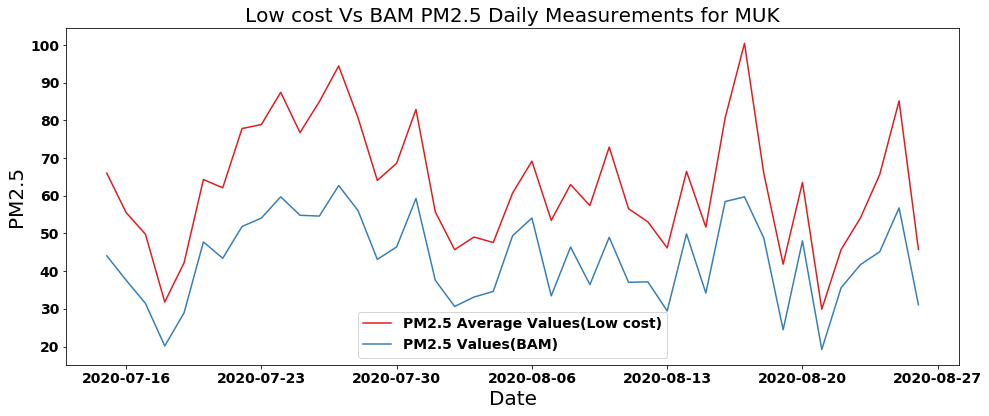

In [1284]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(daily_combined_dataset.Time, 
             daily_combined_dataset['muk_lowcost_daily_PM'], linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
    plt.plot(daily_combined_dataset.Time, 
             daily_combined_dataset['muk_bam_daily_PM'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',
    
    chart_title =  'Low cost Vs BAM PM2.5 Daily Measurements for MUK'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig('daily_pm25_concentration_comparison.png')

# Linear Regression model - Scikit-Learn - Hourly

In [1285]:
# take only rows where hourly_PM is not null
hourly_combined_dataset = hourly_combined_dataset[hourly_combined_dataset['muk_lowcost_hourly_PM'].notna()]
hourly_combined_dataset = hourly_combined_dataset[hourly_combined_dataset['muk_bam_hourly_PM'].notna()]

In [1286]:
X_muk = hourly_combined_dataset['muk_bam_hourly_PM'].values
X_muk = X_muk.reshape((-1, 1))
y_muk = hourly_combined_dataset['muk_lowcost_hourly_PM'].values

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


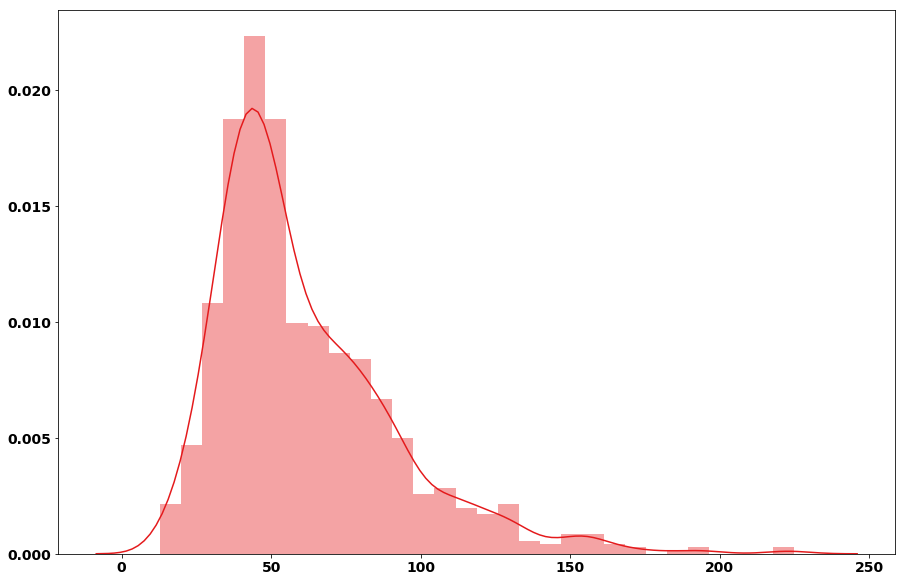

In [1287]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_muk)

In [1288]:
X_train_muk, X_test_muk, y_train_muk, y_test_muk = train_test_split(X_muk, y_muk, test_size=0.2, random_state=0)

In [1289]:
regressor_muk = LinearRegression()  
regressor_muk.fit(X_train_muk, y_train_muk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1290]:
#To retrieve the intercept:
print(regressor_muk.intercept_)
#For retrieving the slope:
print(regressor_muk.coef_)

8.516051947603252
[1.20927538]


### How to get the calibrated value from the raw value,using the equation
### What are we comparing is it raw vs calibrated or BAM vs Calibrated

In [1291]:
y_pred_muk = regressor_muk.predict(X_test_muk)

In [1412]:
df_muk = pd.DataFrame({'Actual': y_test_muk.flatten(), 'Predicted': y_pred_muk.flatten()})
df_muk

,Actual,Predicted
0,40.80,27.017965
1,64.53,65.835705
2,63.40,54.226661
3,41.64,48.663995
4,43.82,46.608227
...,...,...
194,79.76,82.160923
195,195.84,160.280113
196,184.08,159.675475
197,29.16,32.943415


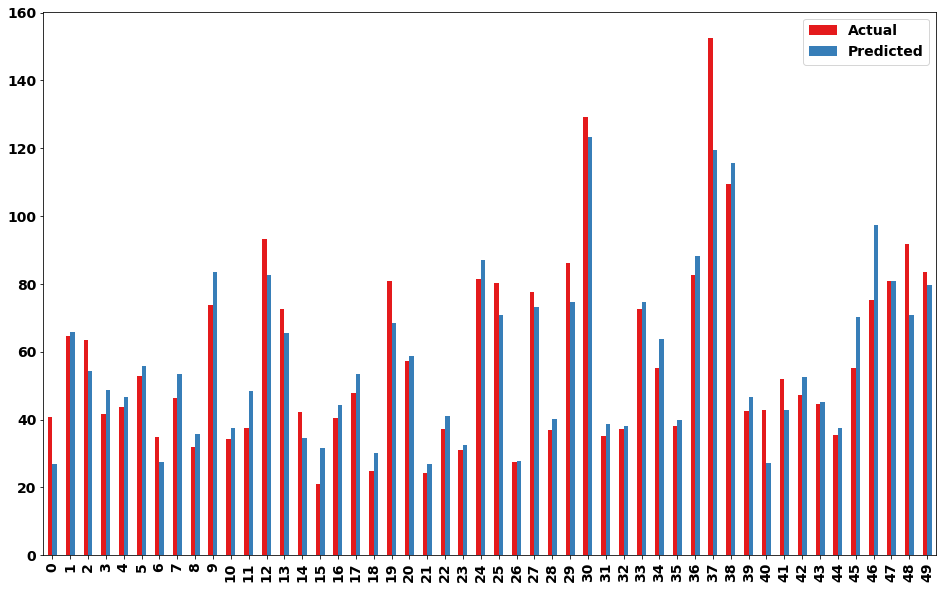

In [1413]:
df1 = df_muk.head(50)
df1.plot(kind='bar',figsize=(16,10)) 
title =  'Hourly Actual Vs Predicted PM2.5 Values for MUK 15th Jul - 26th Aug 2020'
plt.show()

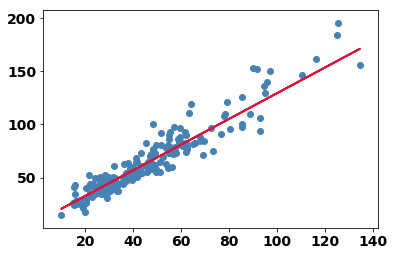

In [1414]:
plt.plot(X_test_muk, y_pred_muk, color='crimson', linewidth=2)
plt.scatter(X_test_muk, y_test_muk,  color='steelblue')
title =  'Hourly Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.show()

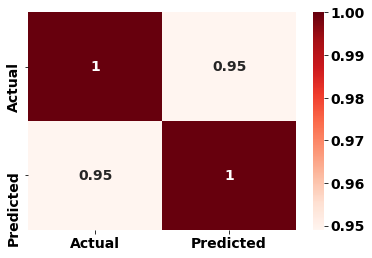

In [1415]:
actual_predicted_correlations =df_muk.corr()
correlations = df_muk['Actual'].corr(df_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1416]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_muk, y_pred_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_muk, y_pred_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_muk, y_pred_muk)))

Mean Absolute Error: 7.4967346222753815
Mean Squared Error: 105.52103260825926
Root Mean Squared Error: 10.27234309241369


# # Linear Regression model - Scikit-Learn - Daily# 

In [1297]:
# take only rows where hourly_PM is not null
daily_combined_dataset = daily_combined_dataset[ daily_combined_dataset['muk_lowcost_daily_PM'].notna()]
daily_combined_dataset = daily_combined_dataset[daily_combined_dataset['muk_bam_daily_PM'].notna()]
daily_combined_dataset['muk_bam_daily_PM'].shape

(43,)

In [1298]:
X_daily = daily_combined_dataset['muk_bam_daily_PM'].values
X_daily = X_daily.reshape((-1, 1))
y_daily = daily_combined_dataset['muk_lowcost_daily_PM'].values
X_daily.shape[0]
y_daily.shape[0]

43

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


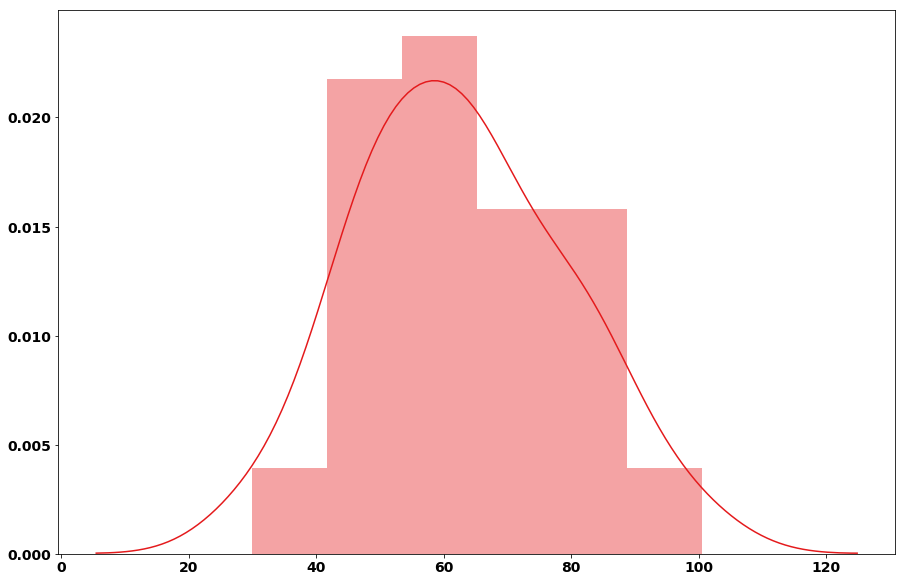

In [1299]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_daily)

In [1300]:
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=0)

In [1301]:
regressor_daily = LinearRegression()  
regressor_daily.fit(X_train_daily, y_train_daily) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1302]:
#To retrieve the intercept:
print(regressor_daily.intercept_)
#For retrieving the slope:
print(regressor_daily.coef_)

2.928698369754457
[1.38506799]


In [1303]:
y_pred_daily = regressor_daily.predict(X_test_daily)

In [1304]:
df_daily = pd.DataFrame({'Actual': y_test_daily.flatten(), 'Predicted': y_pred_daily.flatten()})
df_daily

,Actual,Predicted
0,66.47,72.015890
1,63.56,69.453514
2,56.57,54.231617
3,42.22,43.012566
4,76.77,78.871976
5,57.40,53.372875
6,53.08,54.397825
7,84.97,78.567261
8,29.89,29.535855


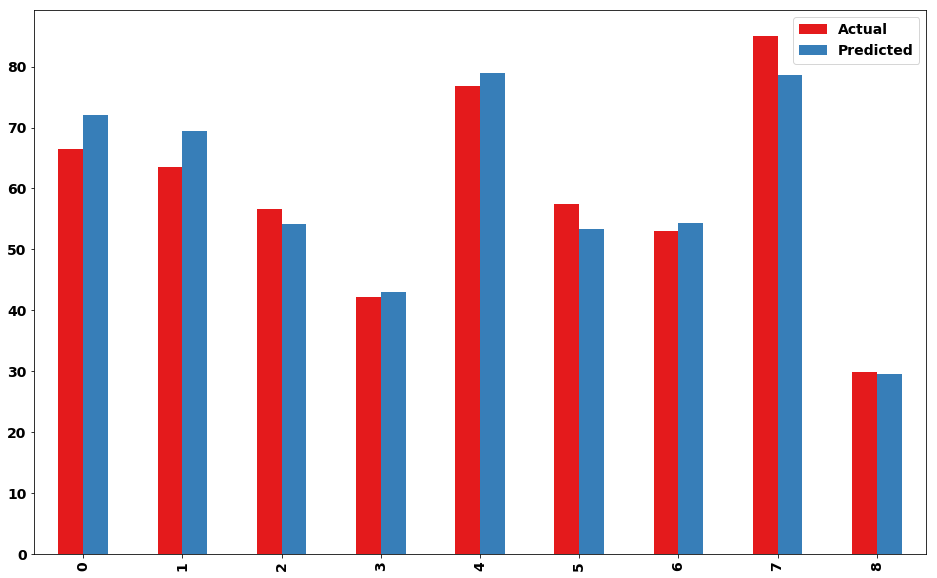

In [1305]:
df1_daily = df_daily
df1_daily.plot(kind='bar',figsize=(16,10)) 
plt.show()

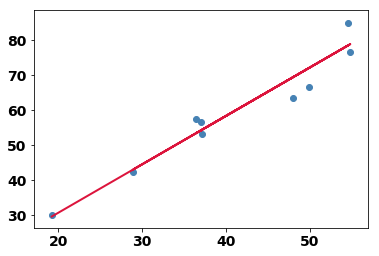

In [1306]:
plt.plot(X_test_daily, y_pred_daily, color='crimson', linewidth=2)
plt.scatter(X_test_daily, y_test_daily,  color='steelblue')
plt.show()

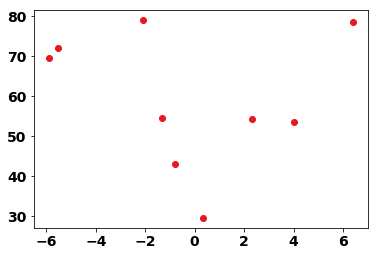

In [1307]:
residuals = y_test_daily-y_pred_daily
plt.scatter(residuals,y_pred_daily)
plt.show()

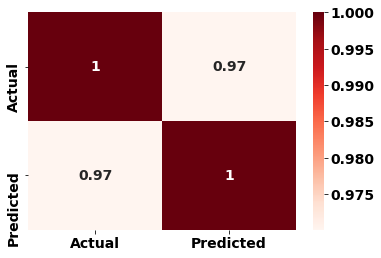

In [1308]:
actual_predicted_correlations =df_daily.corr()
correlations = df_daily['Actual'].corr(df_daily['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1417]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_daily, y_pred_daily))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_daily, y_pred_daily))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_daily, y_pred_daily)))

Mean Absolute Error: 3.197129327585464
Mean Squared Error: 15.00886500576376
Root Mean Squared Error: 3.8741276444851116


### saving and loading models

In [1310]:
joblib.dump(regressor_muk, 'regressor_muk.pkl') 
regressor_loaded = joblib.load('regressor_muk.pkl')

In [1311]:
joblib.dump(regressor_muk, 'regressor_daily.pkl') 
regressor_loaded = joblib.load('regressor_daily.pkl')

### Multiple linear regression

In [1312]:
X_MLRx = hourly_combined_dataset[['muk_bam_hourly_PM','AT(C)','RH(%)']]
X_MLR_muk = hourly_combined_dataset[['muk_bam_hourly_PM','AT(C)','RH(%)']].values
y_MLR_muk = hourly_combined_dataset['muk_lowcost_hourly_PM'].values
hourly_combined_dataset['muk_lowcost_hourly_PM'].shape

(994,)

In [1313]:
X_train_MLR_muk, X_test_MLR_muk, y_train_MLR_muk, y_test_MLR_muk = train_test_split(X_MLR_muk, y_MLR_muk, test_size=0.2, random_state=0)

In [1314]:
regressor_MLR_muk = LinearRegression()  
regressor_MLR_muk.fit(X_train_MLR_muk, y_train_MLR_muk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1315]:
intercept_df_muk = pd.DataFrame(regressor_MLR_muk.intercept_, X_MLRx.columns, columns=['Intercept'])  
intercept_df_muk

,Intercept
muk_bam_hourly_PM,14.187238
AT(C),14.187238
RH(%),14.187238


In [1316]:
coeff_df_muk = pd.DataFrame(regressor_MLR_muk.coef_, X_MLRx.columns, columns=['Coefficient'])  
coeff_df_muk

,Coefficient
muk_bam_hourly_PM,1.139850
AT(C),-0.842454
RH(%),0.209652


In [1317]:
y_pred_mlr_muk = regressor_MLR_muk.predict(X_test_MLR_muk)

In [1318]:
df_mlr_muk = pd.DataFrame({'Actual': y_test_MLR_muk, 'Predicted': y_pred_mlr_muk})

In [1319]:
# y_pred_mlr_muk

In [1320]:
# plt.figure(figsize=(10,6))
# plt.plot(X_test_MLR_muk[:,0], y_pred_mlr_muk, color='crimson', linewidth=2)
# plt.scatter(X_test_MLR_muk[:,0], y_test_MLR_muk,  color='steelblue')
# title = 'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
# plt.title(title,fontsize=20)
# plt.show()


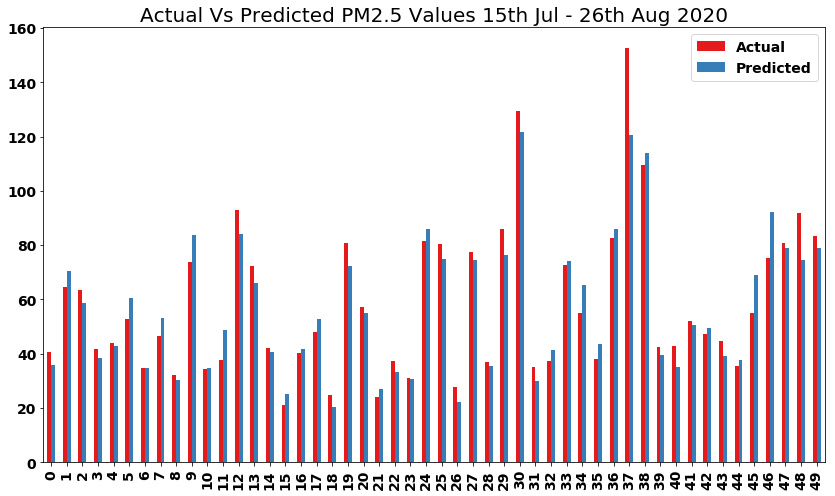

In [1321]:
df1_mlr_muk  = df_mlr_muk .head(50)
# df1.plot(kind='bar',figsize=(14,6))
ax = df1_mlr_muk.plot.bar(figsize=(14,8))
title =  'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.title(title,fontsize=20)
plt.show()

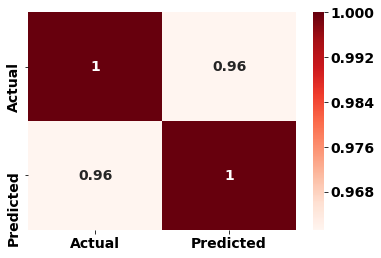

In [1322]:
actual_predicted_correlationsx =df_mlr_muk.corr()
correlations_x= df_mlr_muk['Actual'].corr(df_mlr_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlationsx, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1323]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk)))

Mean Absolute Error: 6.4000549618219145
Mean Squared Error: 81.99972613822428
Root Mean Squared Error: 9.055370016637877


### Multiple linear regression - Daily, MUK

In [1324]:
X_MLRx_daily = daily_combined_dataset[['muk_bam_daily_PM','AT(C)','RH(%)']]
X_MLR_daily = daily_combined_dataset[['muk_bam_daily_PM','AT(C)','RH(%)']].values
y_MLR_daily = daily_combined_dataset['muk_lowcost_daily_PM'].values
daily_combined_dataset['muk_lowcost_daily_PM'].shape

(43,)

In [1325]:
X_train_MLR_daily, X_test_MLR_daily, y_train_MLR_daily, y_test_MLR_daily = train_test_split(X_MLR_daily, y_MLR_daily, test_size=0.2, random_state=0)

In [1326]:
regressor_MLR_daily = LinearRegression()  
regressor_MLR_daily.fit(X_train_MLR_daily, y_train_MLR_daily)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1327]:
intercept_df_daily = pd.DataFrame(regressor_MLR_daily.intercept_, X_MLRx_daily.columns, columns=['Intercept'])  
intercept_df_daily

,Intercept
muk_bam_daily_PM,-14.247334
AT(C),-14.247334
RH(%),-14.247334


In [1328]:
coeff_df_daily = pd.DataFrame(regressor_MLR_daily.coef_, X_MLRx_daily.columns, columns=['Coefficient'])  
coeff_df_daily

,Coefficient
muk_bam_daily_PM,1.374560
AT(C),0.500835
RH(%),0.086514


In [1329]:
y_pred_mlr_daily = regressor_MLR_daily.predict(X_test_MLR_daily)

In [1330]:
df_mlr_daily = pd.DataFrame({'Actual': y_test_MLR_daily, 'Predicted': y_pred_mlr_daily})

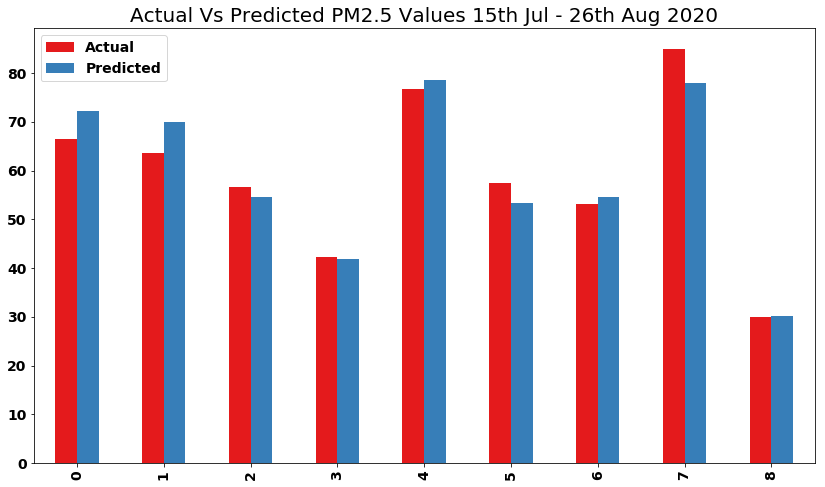

In [1331]:
df1_mlr_daily  = df_mlr_daily.head(50)
# df1.plot(kind='bar',figsize=(14,6))
ax = df1_mlr_daily.plot.bar(figsize=(14,8))
title =  'Actual Vs Predicted PM2.5 Values 15th Jul - 26th Aug 2020'
plt.title(title,fontsize=20)
plt.show()

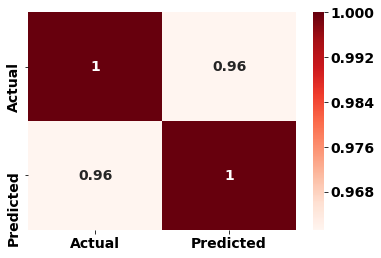

In [1332]:
actual_predicted_correlationsx =df_mlr_muk.corr()
correlations_x= df_mlr_muk['Actual'].corr(df_mlr_muk['Predicted'])
all_features_corr_plot = sns.heatmap(actual_predicted_correlationsx, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1333]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR_muk, y_pred_mlr_muk)))

Mean Absolute Error: 6.4000549618219145
Mean Squared Error: 81.99972613822428
Root Mean Squared Error: 9.055370016637877


### Uncertainity - hourly

In [1334]:
# def f(x):
#     return 1.20927538 * x + 8.516051947603252

In [1335]:
# y_test_muk.shape

In [1336]:
# xdata = X_test_muk.flatten()
# ydata = y_test_muk

In [1337]:
# popt, pcov = curve_fit(func, xdata, ydata)
# popt

In [1338]:
# plt.scatter(xdata, ydata, label='data')
# popt, pcov = curve_fit(func, xdata, ydata)
# popt
# plt.plot(xdata, func(xdata, *popt),
#          label="fit: a={}  , b={} ".format(popt[0],popt[1]))
# popt, pcov = curve_fit(func, xdata, ydata)
# popt
# plt.plot(xdata, func(xdata, *popt),
#          label="fit: a={}  , b={} ".format(popt[0],popt[1]))
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

In [1340]:
x = hourly_combined_dataset['muk_bam_hourly_PM'].values
y = hourly_combined_dataset['muk_lowcost_hourly_PM'].values
x.shape

(994,)

In [1341]:
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

In [1342]:
# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

Optimal Values
a: 1.225944284545537
b: 7.943706205816576


In [1343]:
# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

R^2: 0.8940305624718589
Uncertainty
a: 1.226+/-0.013
b: 7.9+/-0.7


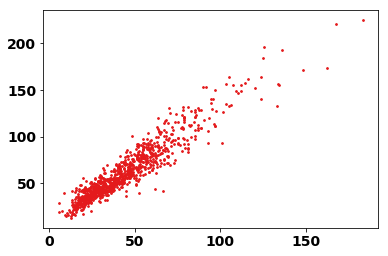

In [1344]:
# plot data
plt.scatter(x, y, s=3, label='Data')

In [1345]:
# calculate regression confidence interval
px = np.linspace(0, 200, 500)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

In [1420]:
nom

array([  2.61976547,   2.81348784,   3.00721021,   3.20093259,
         3.39465496,   3.58837733,   3.7820997 ,   3.97582207,
         4.16954445,   4.36326682,   4.55698919,   4.75071156,
         4.94443394,   5.13815631,   5.33187868,   5.52560105,
         5.71932342,   5.9130458 ,   6.10676817,   6.30049054,
         6.49421291,   6.68793529,   6.88165766,   7.07538003,
         7.2691024 ,   7.46282477,   7.65654715,   7.85026952,
         8.04399189,   8.23771426,   8.43143664,   8.62515901,
         8.81888138,   9.01260375,   9.20632613,   9.4000485 ,
         9.59377087,   9.78749324,   9.98121561,  10.17493799,
        10.36866036,  10.56238273,  10.7561051 ,  10.94982748,
        11.14354985,  11.33727222,  11.53099459,  11.72471696,
        11.91843934,  12.11216171,  12.30588408,  12.49960645,
        12.69332883,  12.8870512 ,  13.08077357,  13.27449594,
        13.46821831,  13.66194069,  13.85566306,  14.04938543,
        14.2431078 ,  14.43683018,  14.63055255,  14.82

In [1346]:
def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

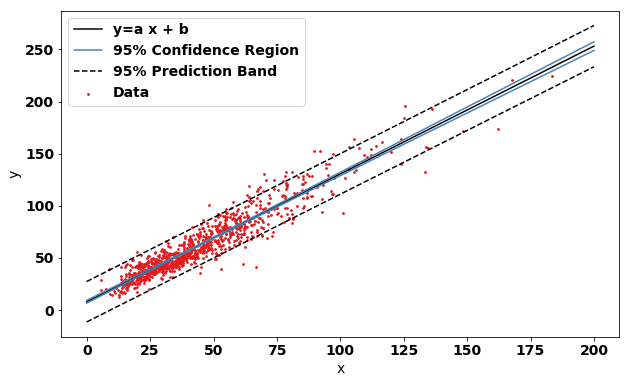

In [1347]:
# plot data
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=3, label='Data')
# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='steelblue',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='steelblue')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# save and show figure
plt.savefig('regression.png')
plt.show()

## US embassy low cost device


### Setting index as timestamp

In [1348]:
us_embassy_lowcost_data["TimeStamp"] = pd.to_datetime(us_embassy_lowcost_data["created_at"])
us_embassy_lowcost_data["TimeStamp"] = us_embassy_lowcost_data["TimeStamp"]+ datetime.timedelta(hours=3)
us_embassy_lowcost_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
us_embassy_lowcost_data = us_embassy_lowcost_data.set_index('TimeStamp')
us_embassy_lowcost_data = us_embassy_lowcost_data.drop(['created_at'], axis=1)
us_embassy_lowcost_data.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-07-25 09:19:34+00:00,81.08,86.48,75.75,83.35,78.41,84.92
2019-07-25 09:20:57+00:00,75.27,81.23,69.52,78.08,72.40,79.66
2019-07-25 09:27:07+00:00,70.85,77.80,68.28,79.55,69.56,78.68
2019-07-25 09:28:28+00:00,67.98,74.47,68.68,78.13,68.33,76.30
2019-07-25 09:29:58+00:00,68.93,76.75,64.97,76.67,66.95,76.71


### Filtering outliers

In [1349]:
us_embassy_lowcost_data = us_embassy_lowcost_data[us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] <= 500.4]
us_embassy_lowcost_data = us_embassy_lowcost_data[us_embassy_lowcost_data['Average_PM2.5_CF_1_ug/m3'] > 0]

### Get data range

In [1350]:
us_embassy_lowcost_data = us_embassy_lowcost_data.loc['2020-02-01':'2020-03-14']

### Hourly concetrations for the US embassy low cost sensors

In [1351]:
us_embassy_lowcost_hourly_std  = us_embassy_lowcost_data.resample('H').std().round(2)
us_embassy_lowcost_hourly_mean = us_embassy_lowcost_data.resample('H').mean().round(2)

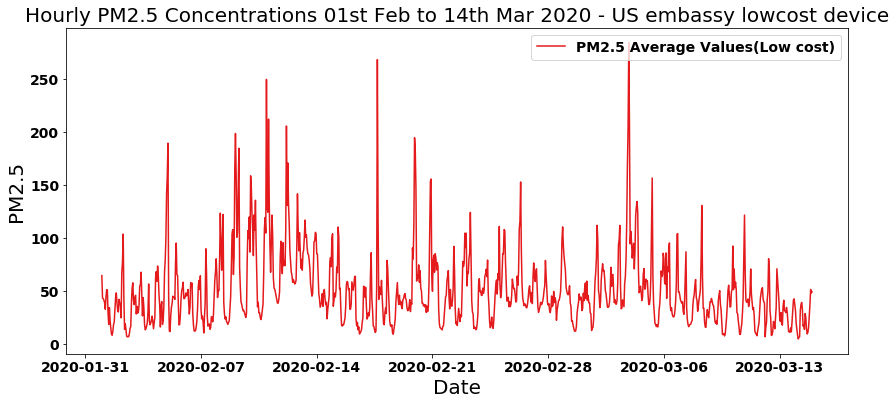

<Figure size 432x288 with 0 Axes>

In [1352]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(us_embassy_lowcost_hourly_mean.index, 
        us_embassy_lowcost_hourly_mean['Average_PM2.5_CF_1_ug/m3'],linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 

chart_title =  'Hourly PM2.5 Concentrations 01st Feb to 14th Mar 2020 - US embassy lowcost device'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
plt.tight_layout()
fig.savefig('hourly_lowcost_us_embassy.png')

### Daily concetrations - US embassy lowcost device

In [1353]:
us_embassy_lowcost_daily_std    = us_embassy_lowcost_data.resample('D').std().round(2)
us_embassy_lowcost_daily_mean   = us_embassy_lowcost_data.resample('D').mean().round(2)

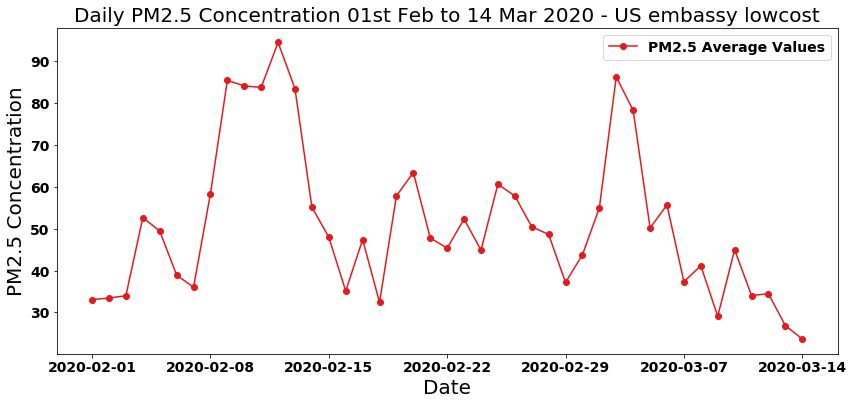

In [1354]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(us_embassy_lowcost_daily_mean.index, 
         us_embassy_lowcost_daily_mean['Average_PM2.5_CF_1_ug/m3'], marker='o', linestyle='solid', label='PM2.5 Average Values')

chart_title =  'Daily PM2.5 Concentration 01st Feb to 14 Mar 2020 - US embassy lowcost'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5 Concentration', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.show()
fig.savefig(os.path.join('daily_lowcost_us_embassy.png'))

## US embassy BAM 

In [1355]:
us_embassy_bam_data.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

In [1356]:
#print(airquality_data_copy.columns)
us_embassy_bam_data = us_embassy_bam_data.drop(['Site','Parameter','Year','Month','Day','Hour','AQI','AQI Category','NowCast Conc.','Conc. Unit','Duration','QC Name'], axis=1)
us_embassy_bam_data.head()

,Date (LT),Raw Conc.
0,2017-01-01 01:00 AM,-999.0
1,2017-01-01 02:00 AM,-999.0
2,2017-01-01 03:00 AM,-999.0
3,2017-01-01 04:00 AM,-999.0
4,2017-01-01 05:00 AM,-999.0


###  Set Timestamp as index

In [1357]:
us_embassy_bam_data["TimeStamp"] = pd.to_datetime(us_embassy_bam_data["Date (LT)"])
us_embassy_bam_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True)
us_embassy_bam_data = us_embassy_bam_data.set_index('TimeStamp')
us_embassy_bam_data = us_embassy_bam_data.drop(['Date (LT)'], axis=1)
us_embassy_bam_data.tail()

,Raw Conc.
TimeStamp,
2020-07-31 20:00:00,63.0
2020-07-31 21:00:00,81.0
2020-07-31 22:00:00,69.0
2020-07-31 23:00:00,93.0
2020-08-01 00:00:00,92.0


### Filter outliers

In [1358]:
us_embassy_bam_data = us_embassy_bam_data[us_embassy_bam_data['Raw Conc.'] <= 500.4]
us_embassy_bam_data = us_embassy_bam_data[us_embassy_bam_data['Raw Conc.'] > 0]

### Getting upper and lower date boundaries

In [1359]:
## get the lower boundary date from the daily airquality dataset
us_embassy_lowcost_hourly_mean.iloc[:1,:]
t= us_embassy_lowcost_hourly_mean.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_lowcost_hourly_mean_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(us_embassy_lowcost_hourly_mean_lower_date)

## get the upper boundary date from the daily airquality dataset
t = us_embassy_lowcost_hourly_mean.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_lowcost_hourly_mean_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(us_embassy_lowcost_hourly_mean_upper_date)

2020-02-01 00:00:00
2020-03-14 23:00:00


In [1360]:
## get the lower boundary date from the daily airquality dataset
us_embassy_bam_data.iloc[:1,:]
t= us_embassy_bam_data.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_bam_data_lower_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(us_embassy_bam_data_lower_date)

## get the upper boundary date from the daily airquality dataset
t = us_embassy_bam_data.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embassy_bam_data_upper_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(us_embassy_bam_data_upper_date)

2017-02-17 22:00:00
2020-08-01 00:00:00


In [1421]:
hourly_same_range_us = us_embassy_bam_data[us_embassy_lowcost_hourly_mean_lower_date:us_embassy_lowcost_hourly_mean_upper_date]
hourly_same_range_us.head()

,Raw Conc.,Time
TimeStamp,,
2020-02-01 00:00:00,133.0,2020-02-01 00:00:00
2020-02-01 01:00:00,75.0,2020-02-01 01:00:00
2020-02-01 02:00:00,52.0,2020-02-01 02:00:00
2020-02-01 03:00:00,58.0,2020-02-01 03:00:00
2020-02-01 04:00:00,46.0,2020-02-01 04:00:00


In [1362]:
hourly_same_range_us.shape

(1031, 1)

### Add Time column for merging the two datasets

In [1363]:
us_embassy_lowcost_hourly_mean  = us_embassy_lowcost_hourly_mean.drop(
['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3',
       'Average_PM10_CF_1_ug/m3', ], axis=1)
hourly_timestamp = us_embassy_lowcost_hourly_mean.index.values
us_embassy_lowcost_hourly_mean["Time"] = hourly_timestamp
us_embassy_lowcost_hourly_mean["Time"] = pd.to_datetime(us_embassy_lowcost_hourly_mean["Time"])
us_embassy_lowcost_hourly_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-02-01 00:00:00+00:00,68.21,61.19,64.70,2020-02-01 00:00:00
2020-02-01 01:00:00+00:00,45.05,42.20,43.63,2020-02-01 01:00:00
2020-02-01 02:00:00+00:00,44.34,41.71,43.02,2020-02-01 02:00:00
2020-02-01 03:00:00+00:00,42.26,40.67,41.46,2020-02-01 03:00:00
2020-02-01 04:00:00+00:00,40.07,38.70,39.39,2020-02-01 04:00:00


In [1364]:
hourly_timestamp = hourly_same_range_us.index.values
#print(len(hourly_timestamp))
hourly_same_range_us["Time"] = hourly_timestamp
#print(hourly_meteorology_data.columns)
hourly_same_range_us["Time"] = pd.to_datetime(hourly_same_range_us["Time"])

hourly_same_range_us.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Raw Conc.,Time
TimeStamp,,
2020-02-01 00:00:00,133.0,2020-02-01 00:00:00
2020-02-01 01:00:00,75.0,2020-02-01 01:00:00
2020-02-01 02:00:00,52.0,2020-02-01 02:00:00
2020-02-01 03:00:00,58.0,2020-02-01 03:00:00
2020-02-01 04:00:00,46.0,2020-02-01 04:00:00


In [1365]:
hourly_combined_dataset_us_embassy = pd.merge(us_embassy_lowcost_hourly_mean, hourly_same_range_us, on='Time')
#hourly_combined_dataset = hourly_combined_dataset.dropna()
#hourly_combined_dataset= hourly_combined_dataset.set_index('TimeStamp')

hourly_combined_dataset_us_embassy.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'lowcost_PM2.5','Raw Conc.':'bam_PM2.5',
                                     },inplace=True)

hourly_combined_dataset_us_embassy.to_csv('hourly_US_embassy_lowcost.csv')
 
hourly_combined_dataset_us_embassy.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,lowcost_PM2.5,Time,bam_PM2.5
0,68.21,61.19,64.70,2020-02-01 00:00:00,133.0
1,45.05,42.20,43.63,2020-02-01 01:00:00,75.0
2,44.34,41.71,43.02,2020-02-01 02:00:00,52.0
3,42.26,40.67,41.46,2020-02-01 03:00:00,58.0
4,40.07,38.70,39.39,2020-02-01 04:00:00,46.0


In [1366]:
# hourly_combined_dataset_us_embassy['bam_PM2.5'] = hourly_combined_dataset_us_embassy['bam_PM2.5'].shift(-1)

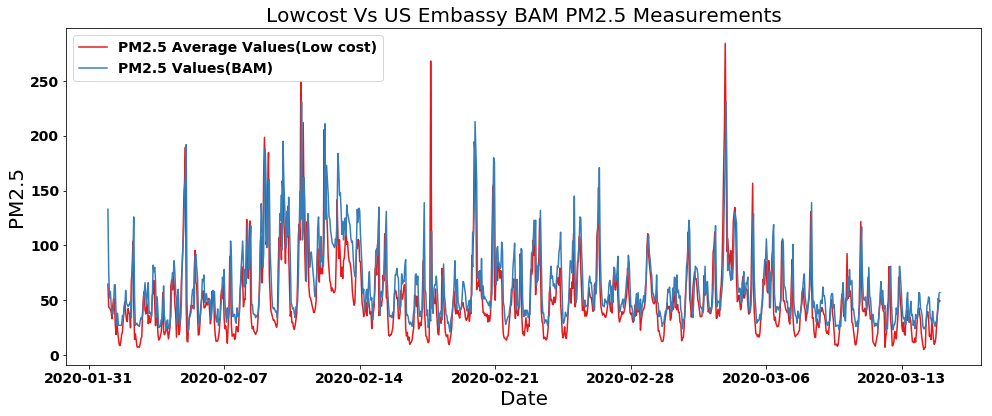

In [1367]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(hourly_combined_dataset_us_embassy.Time, 
         hourly_combined_dataset_us_embassy['lowcost_PM2.5'],linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
plt.plot(hourly_combined_dataset_us_embassy.Time, 
         hourly_combined_dataset_us_embassy['bam_PM2.5'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',

chart_title =  'Lowcost Vs US Embassy BAM PM2.5 Measurements'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('hourly_US_lowcost')

### Daily concetrations - Us embassy

In [1368]:
us_embassy_lowcost_daily_std    = us_embassy_lowcost_data.resample('D').std().round(2)
us_embassy_lowcost_daily_mean   = us_embassy_lowcost_data.resample('D').mean().round(2)

### Add Time column for merging the two datasets

In [1369]:
us_embassy_lowcost_daily_mean  = us_embassy_lowcost_daily_mean.drop(
['Sensor1 PM10_CF_1_ug/m3','Sensor2 PM10_CF_1_ug/m3','Average_PM10_CF_1_ug/m3', ], axis=1)
daily_timestamp = us_embassy_lowcost_daily_mean.index.values
us_embassy_lowcost_daily_mean["Time"] = daily_timestamp
us_embassy_lowcost_daily_mean["Time"] = pd.to_datetime(us_embassy_lowcost_daily_mean["Time"])

us_embassy_lowcost_daily_mean.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Time
TimeStamp,,,,
2020-02-01 00:00:00+00:00,34.13,32.00,33.07,2020-02-01
2020-02-02 00:00:00+00:00,34.63,32.24,33.43,2020-02-02
2020-02-03 00:00:00+00:00,35.07,32.91,33.99,2020-02-03
2020-02-04 00:00:00+00:00,54.92,50.36,52.64,2020-02-04
2020-02-05 00:00:00+00:00,50.75,48.14,49.44,2020-02-05


In [1370]:
daily_timestamp = us_embassy_bam_data.index.values
us_embassy_bam_data["Time"] = daily_timestamp
us_embassy_bam_data["Time"] = pd.to_datetime(us_embassy_bam_data["Time"])

us_embassy_bam_data.head()

,Raw Conc.,Time
TimeStamp,,
2017-02-17 22:00:00,60.0,2017-02-17 22:00:00
2017-02-17 23:00:00,62.0,2017-02-17 23:00:00
2017-02-18 00:00:00,64.0,2017-02-18 00:00:00
2017-02-18 01:00:00,43.0,2017-02-18 01:00:00
2017-02-18 02:00:00,49.0,2017-02-18 02:00:00


In [1371]:
daily_combined_dataset_us= pd.merge(us_embassy_lowcost_daily_mean, us_embassy_bam_data, on='Time')
daily_combined_dataset_us.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'lowcost_daily_PM2.5','Raw Conc.':'bam_daily_PM2.5',
                                     },inplace=True)
daily_combined_dataset_us.to_csv('Daily_US_PMS.csv')
 
daily_combined_dataset_us.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,lowcost_daily_PM2.5,Time,bam_daily_PM2.5
0,34.13,32.00,33.07,2020-02-01,133.0
1,34.63,32.24,33.43,2020-02-02,46.0
2,35.07,32.91,33.99,2020-02-03,45.0
3,54.92,50.36,52.64,2020-02-04,23.0
4,50.75,48.14,49.44,2020-02-05,162.0


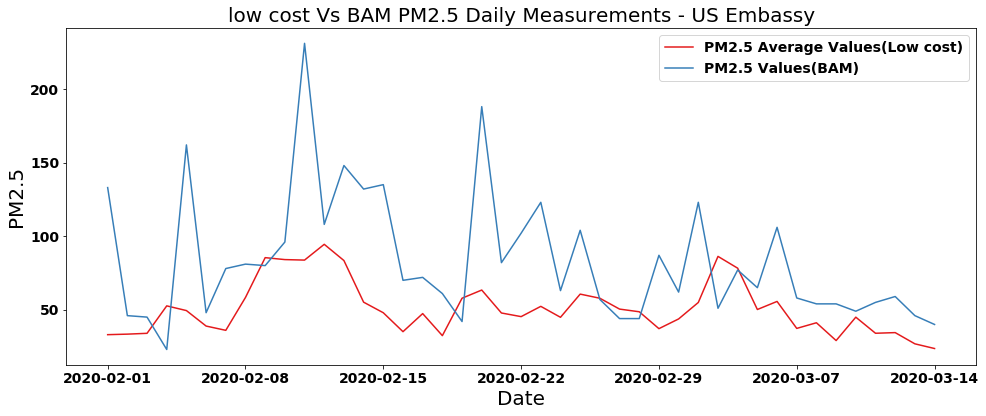

In [1372]:
fig = plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
plt.plot(daily_combined_dataset_us.Time, 
         daily_combined_dataset_us['lowcost_daily_PM2.5'], linestyle='solid', label='PM2.5 Average Values(Low cost)') #marker='o', 
plt.plot(daily_combined_dataset_us.Time, 
         daily_combined_dataset_us['bam_daily_PM2.5'], linestyle='solid', label='PM2.5 Values(BAM)') # marker='x',


chart_title =  'low cost Vs BAM PM2.5 Daily Measurements - US Embassy'
plt.title(chart_title,fontsize=20)
plt.ylabel('PM2.5', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('daily_US_PMS.png')

## Linear Regression model - Scikit-Learn - Hourly

In [1373]:
hourly_combined_dataset_us_embassy = hourly_combined_dataset_us_embassy[hourly_combined_dataset_us_embassy['lowcost_PM2.5'].notna()]
hourly_combined_dataset_us_embassy = hourly_combined_dataset_us_embassy[hourly_combined_dataset_us_embassy['bam_PM2.5'].notna()]
print(hourly_combined_dataset_us_embassy['lowcost_PM2.5'])

0       64.70
1       43.63
2       43.02
3       41.46
4       39.39
        ...  
1026    26.63
1027    37.42
1028    51.68
1029    48.38
1030    49.51
Name: lowcost_PM2.5, Length: 1031, dtype: float64


In [1374]:
X_us_embassy = hourly_combined_dataset_us_embassy['bam_PM2.5'].values
X_us_embassy = X_us_embassy.reshape((-1, 1))
y_us_embassy = hourly_combined_dataset_us_embassy['lowcost_PM2.5'].values
print(X_us_embassy)
print(y_us_embassy)

[[133.]
 [ 75.]
 [ 52.]
 ...
 [ 43.]
 [ 56.]
 [ 57.]]
[64.7  43.63 43.02 ... 51.68 48.38 49.51]


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


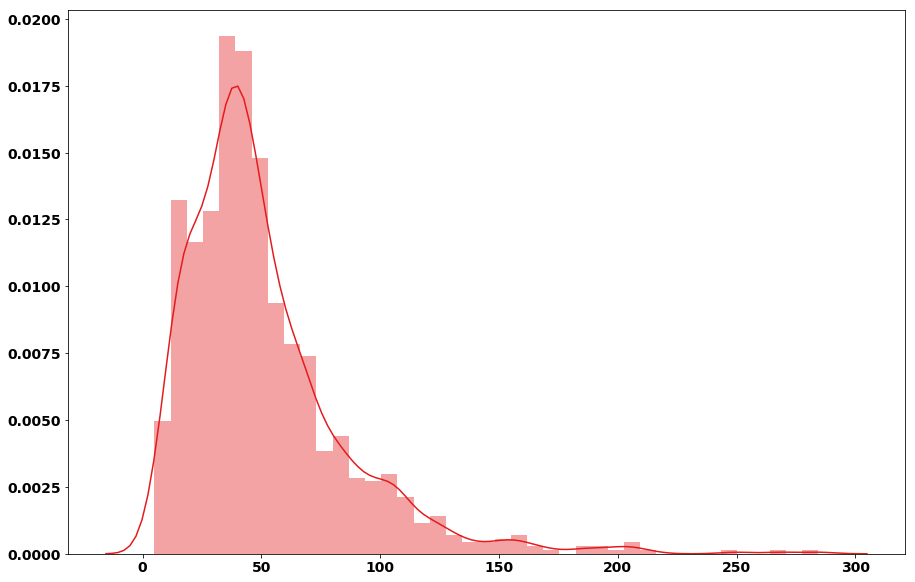

In [1375]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_us_embassy)

In [1376]:
X_train_us_embassy, X_test_us_embassy, y_train_us_embassy, y_test_us_embassy = train_test_split(X_us_embassy, y_us_embassy, test_size=0.2, random_state=0)

In [1377]:
regressor_us_embassy = LinearRegression()  
regressor_us_embassy.fit(X_train_us_embassy, y_train_us_embassy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1378]:
#To retrieve the intercept:
print(regressor_us_embassy.intercept_)
#For retrieving the slope:
print(regressor_us_embassy.coef_)

1.3441848663111386
[0.79561658]


In [1379]:
y_pred_us_embassy = regressor_us_embassy.predict(X_test_us_embassy)

In [1380]:
df_us_embassy = pd.DataFrame({'Actual': y_test_us_embassy.flatten(), 'Predicted': y_pred_us_embassy.flatten()})
df_us_embassy

,Actual,Predicted
0,39.57,45.103097
1,39.51,33.964465
2,51.39,36.351314
3,78.36,101.591874
4,46.23,43.511864
...,...,...
202,52.07,42.716247
203,18.66,33.964465
204,31.82,33.964465
205,36.40,37.146931


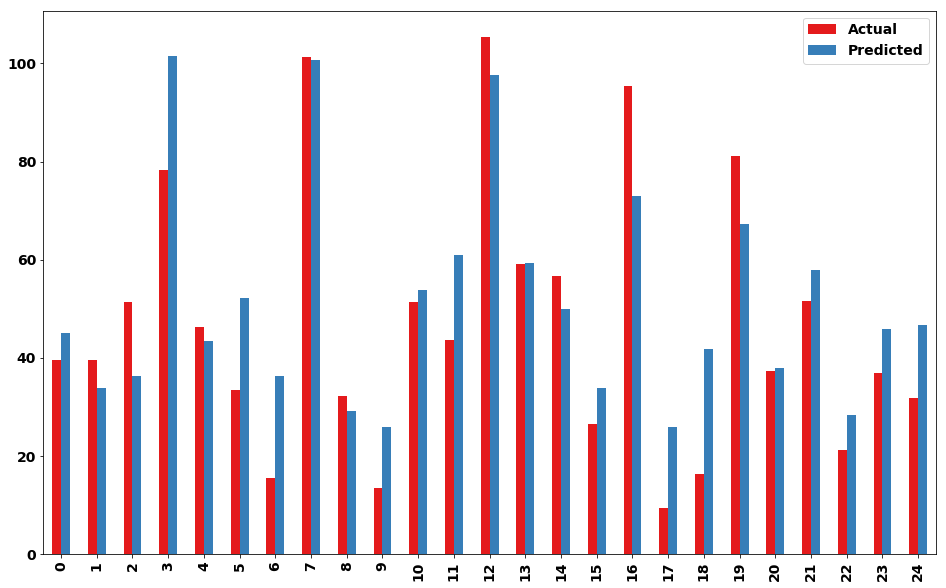

In [1381]:
df1_us_embassy = df_us_embassy.head(25)
df1_us_embassy.plot(kind='bar',figsize=(16,10)) 
plt.show()

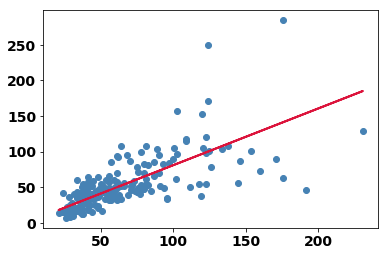

In [1382]:
plt.scatter(X_test_us_embassy, y_test_us_embassy,  color='steelblue')
plt.plot(X_test_us_embassy, y_pred_us_embassy, color='crimson', linewidth=2)
plt.show()

In [1383]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_us_embassy, y_pred_us_embassy))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_us_embassy, y_pred_us_embassy))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_us_embassy, y_pred_us_embassy)))

Mean Absolute Error: 16.447487117700195
Mean Squared Error: 692.9139281245393
Root Mean Squared Error: 26.323258311321176


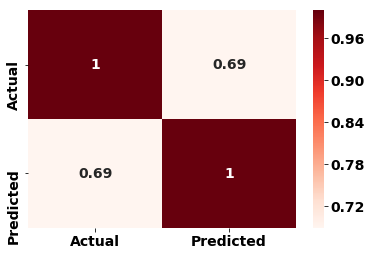

In [1384]:
correlations_us_embassy =df_us_embassy.corr()
correlations_us = df_us_embassy['Actual'].corr(df_us_embassy['Predicted'])
all_features_corr = sns.heatmap(correlations_us_embassy, annot=True, cmap=plt.cm.Reds)
plt.show()

### Uncertainity - Hourly 

In [1385]:
xx = hourly_combined_dataset_us_embassy['bam_PM2.5'].values
yy = hourly_combined_dataset_us_embassy['lowcost_PM2.5'].values
xx.shape

(1031,)

In [1386]:
n = len(yy)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, xx, yy)

In [1387]:
# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

Optimal Values
a: 0.7741145994970076
b: 2.6197654687466203


In [1388]:
# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

R^2: 0.12615423915799484
Uncertainty
a: 0.774+/-0.021
b: 2.6+/-1.5


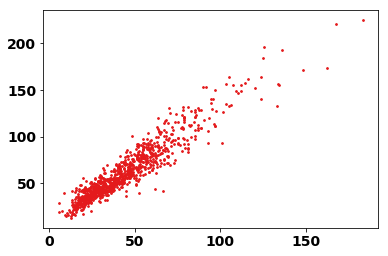

In [1389]:
# plot data
plt.scatter(x, y, s=3, label='Data')

In [1390]:
# calculate regression confidence interval
px = np.linspace(0, 250, 1000)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

In [1391]:
def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

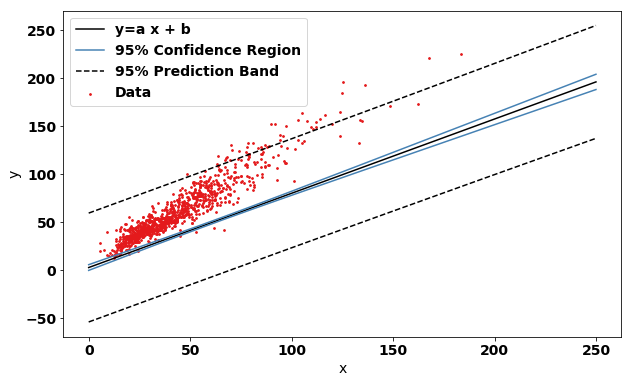

In [1392]:
# plot data
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=3, label='Data')
# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='steelblue',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='steelblue')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# save and show figure
plt.savefig('regression.png')
plt.show()

### Prediction of low cost MUK concetrations using US embassy model - hourly

In [1429]:
prediction_muk = 1.3441848663111386 + 0.79561658 * y_us_embassy # prediction = regressor.intercept_ + regressor.coef_ * raw

In [1430]:
df_predicted_muk = pd.DataFrame({'Actual': y_us_embassy.flatten(), 'Predicted': prediction_muk.flatten()})

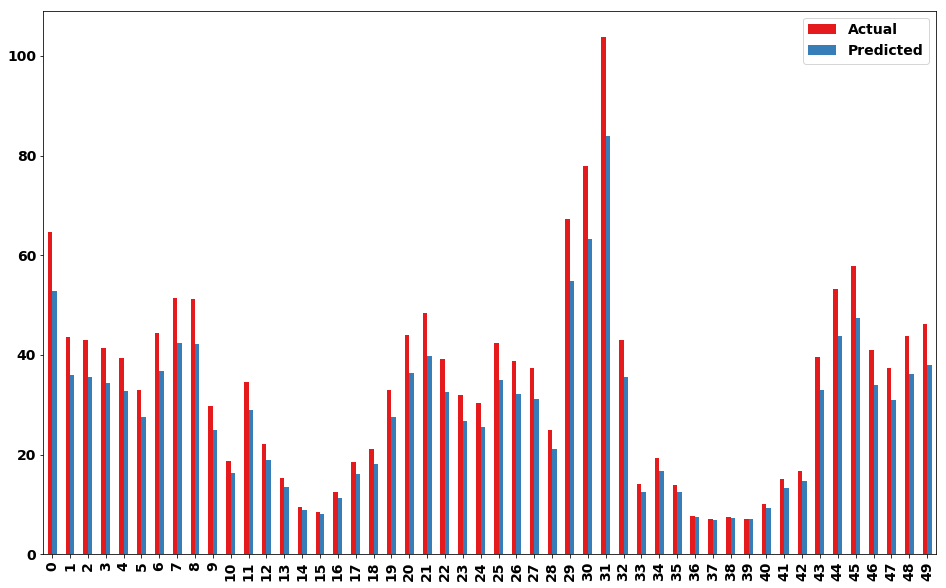

In [1431]:
df_predicted_muk = df_predicted_muk.head(50)
df_predicted_muk .plot(kind='bar',figsize=(16,10)) 

plt.show()

In [1434]:
print('Mean Absolute Error:', metrics.mean_absolute_error( y_us_embassy, prediction_muk))  
print('Mean Squared Error:', metrics.mean_squared_error(y_us_embassy, prediction_muk))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_us_embassy, prediction_muk)))

Mean Absolute Error: 9.111675836562231
Mean Squared Error: 133.12072743660187
Root Mean Squared Error: 11.537795605599966


### Prediction of low cost US embassy concetrations using MUK model - hourly

In [1397]:
prediction_us_embassy = 8.516051947603252 + 1.20927538 * y_muk # prediction = regressor.intercept_ + regressor.coef_ * raw

In [1435]:
df_predicted_us_embassy = pd.DataFrame({'Actual': y_muk.flatten(), 'Predicted': prediction_us_embassy.flatten()})

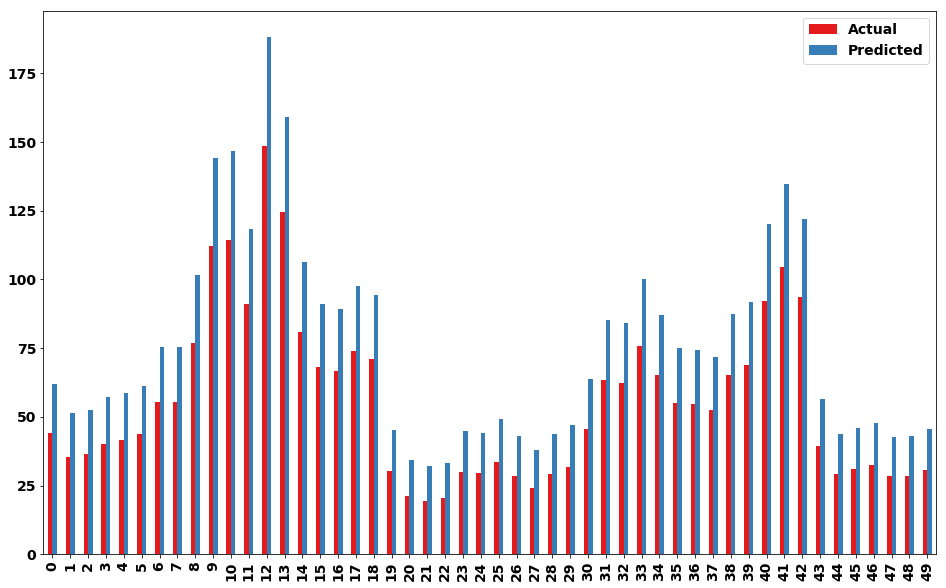

In [1436]:
df_predicted_us_embassy = df_predicted_us_embassy.head(50)
df_predicted_us_embassy .plot(kind='bar',figsize=(16,10)) 
plt.show()

In [1400]:
print('Mean Absolute Error:', metrics.mean_absolute_error(X_muk, prediction_us_embassy))  
print('Mean Squared Error:', metrics.mean_squared_error(X_muk, prediction_us_embassy))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_muk, prediction_us_embassy)))

Mean Absolute Error: 39.09852194067247
Mean Squared Error: 1796.4797509830387
Root Mean Squared Error: 42.38490003507191
